In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
try:
    ball_by_ball_data = pd.read_csv('ball_by_ball_data.csv')
    ipl_matches_data = pd.read_csv('ipl_matches_data.csv')

    print("Data loaded successfully!")

    # Display the first few rows of each dataframe
    print("\nBall-by-ball data head:")
    print(ball_by_ball_data.head())

    print("\nIPL matches data head:")
    print(ipl_matches_data.head())

    # Display info about each dataframe
    print("\nBall-by-ball data info:")
    ball_by_ball_data.info()

    print("\nIPL matches data info:")
    ipl_matches_data.info()

except FileNotFoundError:
    print("Error: Make sure 'ball_by_ball_data.csv' and 'ipl_matches_data.csv' are in the same directory as your script.")

Data loaded successfully!

Ball-by-ball data head:
   season_id  match_id       batter   bowler  non_striker  team_batting  \
0       2008    335982   SC Ganguly  P Kumar  BB McCullum             6   
1       2008    335982  BB McCullum  P Kumar   SC Ganguly             6   
2       2008    335982  BB McCullum  P Kumar   SC Ganguly             6   
3       2008    335982  BB McCullum  P Kumar   SC Ganguly             6   
4       2008    335982  BB McCullum  P Kumar   SC Ganguly             6   

   team_bowling  over_number  ball_number  batter_runs  ...  is_bye  \
0             1            0            0            0  ...   False   
1             1            0            1            0  ...   False   
2             1            0            2            0  ...   False   
3             1            0            3            0  ...   False   
4             1            0            4            0  ...   False   

   is_penalty wide_ball_runs no_ball_runs leg_bye_runs bye_runs  penalt

In [2]:
# Data Cleaning
# Filling missing values in 'city' column
ipl_matches_data['city'].fillna(ipl_matches_data['venue'].apply(lambda x: x.split(',')[0]), inplace=True)

# Some team names have changed over the years. Let's create a dictionary to standardize them.
team_name_mapping = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}
ipl_matches_data['team1'] = ipl_matches_data['team1'].replace(team_name_mapping)
ipl_matches_data['team2'] = ipl_matches_data['team2'].replace(team_name_mapping)
ipl_matches_data['match_winner'] = ipl_matches_data['match_winner'].replace(team_name_mapping)
ipl_matches_data['toss_winner'] = ipl_matches_data['toss_winner'].replace(team_name_mapping)


# Merging the two dataframes
# We will merge on 'match_id'
data = pd.merge(left=ipl_matches_data, right=ball_by_ball_data, on='match_id', how='right')

# Displaying the first few rows of the merged dataframe
print("Merged Dataframe Head:")
print(data.head())

# Displaying info of the merged dataframe
print("\nMerged Dataframe Info:")
data.info()

# Check for any remaining null values in the merged dataframe
print("\nNull values in merged dataframe:")
print(data.isnull().sum())

C:\Users\prajw\AppData\Local\Temp\ipykernel_9012\1072516572.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ipl_matches_data['city'].fillna(ipl_matches_data['venue'].apply(lambda x: x.split(',')[0]), inplace=True)


Merged Dataframe Head:
   match_id  season_id_x  balls_per_over       city  match_date  \
0    335982         2008               6  Bangalore  18-04-2008   
1    335982         2008               6  Bangalore  18-04-2008   
2    335982         2008               6  Bangalore  18-04-2008   
3    335982         2008               6  Bangalore  18-04-2008   
4    335982         2008               6  Bangalore  18-04-2008   

              event_name  match_number gender match_type format  ...  is_bye  \
0  Indian Premier League           1.0   male        T20    T20  ...   False   
1  Indian Premier League           1.0   male        T20    T20  ...   False   
2  Indian Premier League           1.0   male        T20    T20  ...   False   
3  Indian Premier League           1.0   male        T20    T20  ...   False   
4  Indian Premier League           1.0   male        T20    T20  ...   False   

  is_penalty wide_ball_runs no_ball_runs  leg_bye_runs  bye_runs  \
0      False             

Top 10 IPL Rivalries by Matches Played:
        teams  matches_played   teams_str
0      (2, 6)              39      2 vs 6
1    (3, 129)              39    3 vs 129
2    (1, 494)              37    1 vs 494
3    (2, 252)              37    2 vs 252
4    (3, 252)              37    3 vs 252
5      (1, 2)              36      1 vs 2
6  (252, 494)              35  252 vs 494
7      (2, 3)              35      2 vs 3
8      (3, 6)              35      3 vs 6
9    (6, 494)              35    6 vs 494


C:\Users\prajw\AppData\Local\Temp\ipykernel_9012\1990282805.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='matches_played', y='teams_str', data=top_10_rivalries, palette='viridis', orient='h')



Generated a bar chart of the top 10 rivalries and saved it as 'top_10_rivalries.png'


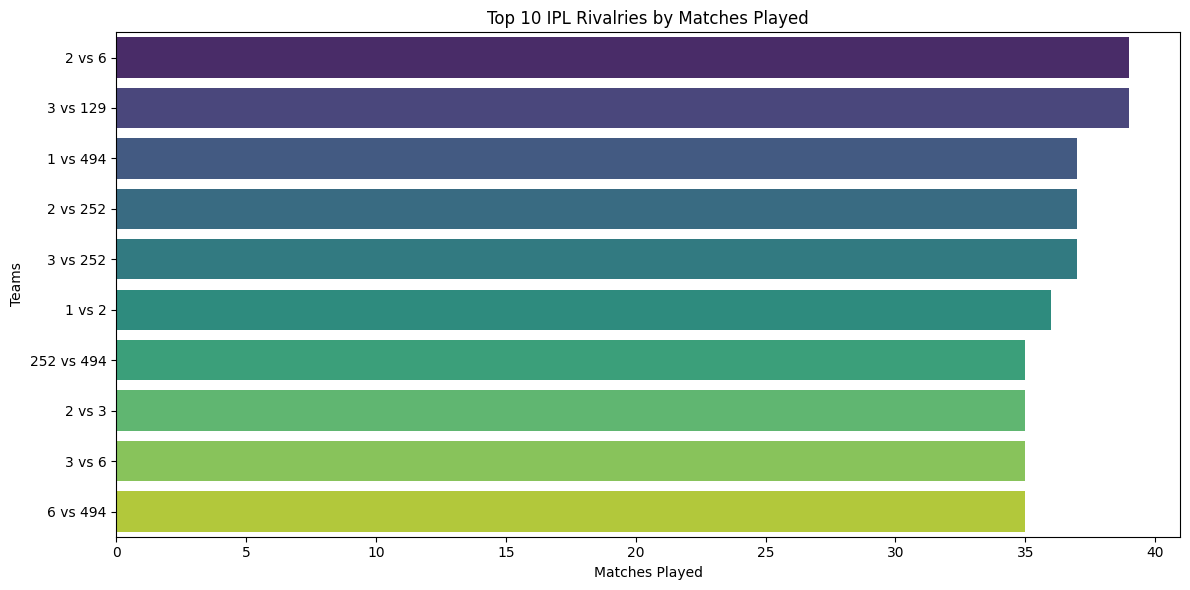

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming ipl_matches_data is loaded and available in your environment.
# For consistency and to avoid errors, we'll re-apply the team name standardization.
team_name_mapping = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}

# Make sure to create a copy to avoid SettingWithCopyWarning
ipl_matches_data = ipl_matches_data.copy()

ipl_matches_data['team1'] = ipl_matches_data['team1'].replace(team_name_mapping)
ipl_matches_data['team2'] = ipl_matches_data['team2'].replace(team_name_mapping)
ipl_matches_data['match_winner'] = ipl_matches_data['match_winner'].replace(team_name_mapping)
ipl_matches_data['toss_winner'] = ipl_matches_data['toss_winner'].replace(team_name_mapping)


# Create a new dataframe to count matches between teams
matches = ipl_matches_data.copy()
matches['teams'] = matches.apply(lambda row: tuple(sorted((row['team1'], row['team2']))), axis=1)
rivalries = matches['teams'].value_counts().reset_index()
rivalries.columns = ['teams', 'matches_played']

# ---- FIX IS HERE ----
# Convert tuple of teams to a string for plotting
rivalries['teams_str'] = rivalries['teams'].apply(lambda x: f'{x[0]} vs {x[1]}')
# --------------------

# Let's get the top 10 rivalries
top_10_rivalries = rivalries.head(10)

print("Top 10 IPL Rivalries by Matches Played:")
print(top_10_rivalries)

# Now, let's visualize this using the new 'teams_str' column
plt.figure(figsize=(12, 6))
sns.barplot(x='matches_played', y='teams_str', data=top_10_rivalries, palette='viridis', orient='h')
plt.title('Top 10 IPL Rivalries by Matches Played')
plt.xlabel('Matches Played')
plt.ylabel('Teams')
plt.tight_layout()
plt.savefig('top_10_rivalries.png')
print("\nGenerated a bar chart of the top 10 rivalries and saved it as 'top_10_rivalries.png'")

Top 10 Most Exciting IPL Matches (by narrowest win margins):
         match_details  winning_team win_margin
811   252 vs 134, 2012           252     1 runs
179     3 vs 129, 2019             3     1 runs
158     1 vs 129, 2019             1     1 runs
1065    252 vs 5, 2016             5     1 runs
497     2 vs 134, 2024             2     1 runs
630     2 vs 494, 2009           494     1 runs
483       6 vs 1, 2024             6     1 runs
261     1 vs 252, 2021             1     1 runs
1081    494 vs 1, 2016             1     1 runs
817    1419 vs 3, 2012             3     1 runs

Generated a histogram of win margins and saved it as 'exciting_matches_distribution.png'


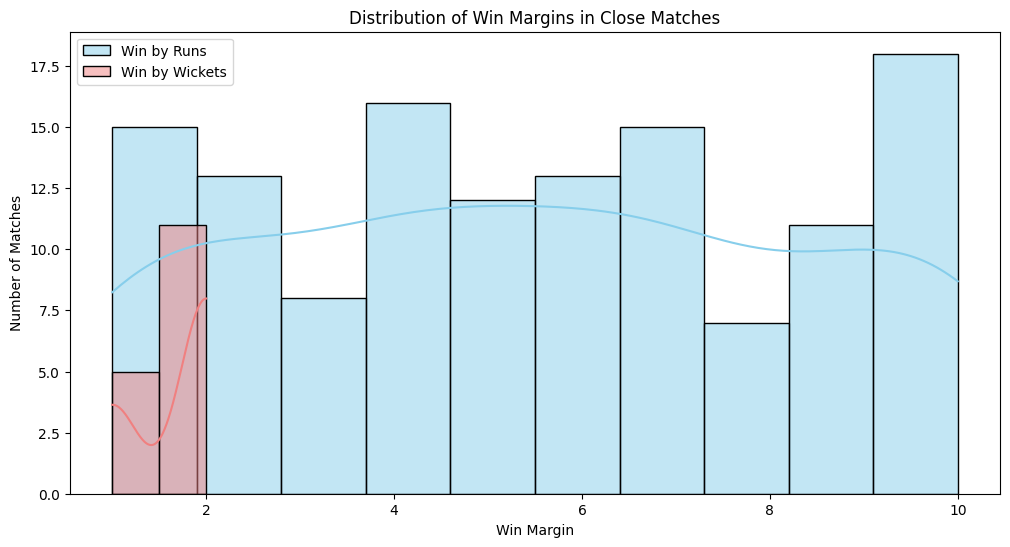

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ipl_matches_data is loaded and the team names are standardized.
# For consistency, let's re-apply the standardization.
team_name_mapping = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}
ipl_matches_data = ipl_matches_data.copy()
ipl_matches_data['team1'] = ipl_matches_data['team1'].replace(team_name_mapping)
ipl_matches_data['team2'] = ipl_matches_data['team2'].replace(team_name_mapping)
ipl_matches_data['match_winner'] = ipl_matches_data['match_winner'].replace(team_name_mapping)
ipl_matches_data['toss_winner'] = ipl_matches_data['toss_winner'].replace(team_name_mapping)

# Create a new dataframe for exciting matches
exciting_matches = ipl_matches_data[
    (ipl_matches_data['win_by_runs'].notna() & (ipl_matches_data['win_by_runs'] <= 10)) |
    (ipl_matches_data['win_by_wickets'].notna() & (ipl_matches_data['win_by_wickets'] <= 2))
].copy()

# Add a column to describe the thrilling finish
exciting_matches['match_details'] = exciting_matches.apply(
    lambda row: f"{row['team1']} vs {row['team2']}, {row['season']}", axis=1
)
exciting_matches['winning_team'] = exciting_matches['match_winner']
exciting_matches['win_margin'] = exciting_matches.apply(
    lambda row: f"{int(row['win_by_runs'])} runs" if pd.notna(row['win_by_runs']) and row['win_by_runs'] > 0 else f"{int(row['win_by_wickets'])} wickets",
    axis=1
)

# Select and reorder columns for a clean output
exciting_matches_summary = exciting_matches[['match_details', 'winning_team', 'win_margin']].sort_values(by=['win_margin'])

print("Top 10 Most Exciting IPL Matches (by narrowest win margins):")
print(exciting_matches_summary.head(10))

# Let's create a visualization of the win margins
plt.figure(figsize=(12, 6))
sns.histplot(exciting_matches['win_by_runs'].dropna(), bins=10, kde=True, color='skyblue', label='Win by Runs')
sns.histplot(exciting_matches['win_by_wickets'].dropna(), bins=2, kde=True, color='lightcoral', label='Win by Wickets')
plt.title('Distribution of Win Margins in Close Matches')
plt.xlabel('Win Margin')
plt.ylabel('Number of Matches')
plt.legend()
plt.savefig('exciting_matches_distribution.png')
print("\nGenerated a histogram of win margins and saved it as 'exciting_matches_distribution.png'")

Top 10 Players by Player of the Match Awards:
   player_name  awards_count
0        245.0            25
1          1.0            22
2         25.0            21
3        332.0            19
4         38.0            18
5         12.0            18
6         65.0            17
7          5.0            16
8        348.0            16
9       1437.0            16


C:\Users\prajw\AppData\Local\Temp\ipykernel_9012\3763986898.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awards_count', y='player_name', data=top_10_pom, palette='coolwarm', orient='h')



Generated a bar chart for top 10 Player of the Match winners and saved it as 'top_10_player_of_match.png'

Top 10 Run Scorers in IPL:
             batter  batter_runs
658         V Kohli         8671
500       RG Sharma         7048
535        S Dhawan         6769
151       DA Warner         6567
569        SK Raina         5536
389        MS Dhoni         5439
297        KL Rahul         5235
31   AB de Villiers         5181
51        AM Rahane         5032
128        CH Gayle         4997


C:\Users\prajw\AppData\Local\Temp\ipykernel_9012\3763986898.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batter_runs', y='batter', data=top_10_run_scorers, palette='plasma', orient='h')
C:\Users\prajw\AppData\Local\Temp\ipykernel_9012\3763986898.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_wicket', y='bowler', data=top_10_wicket_takers, palette='magma', orient='h')



Generated a bar chart for top 10 run scorers and saved it as 'top_10_run_scorers.png'

Top 10 Wicket Takers in IPL:
         bowler  is_wicket
459   YS Chahal        221
62      B Kumar        198
305   PP Chawla        192
389   SP Narine        192
314    R Ashwin        187
173   JJ Bumrah        186
104    DJ Bravo        183
7      A Mishra        174
329   RA Jadeja        170
382  SL Malinga        170

Generated a bar chart for top 10 wicket takers and saved it as 'top_10_wicket_takers.png'


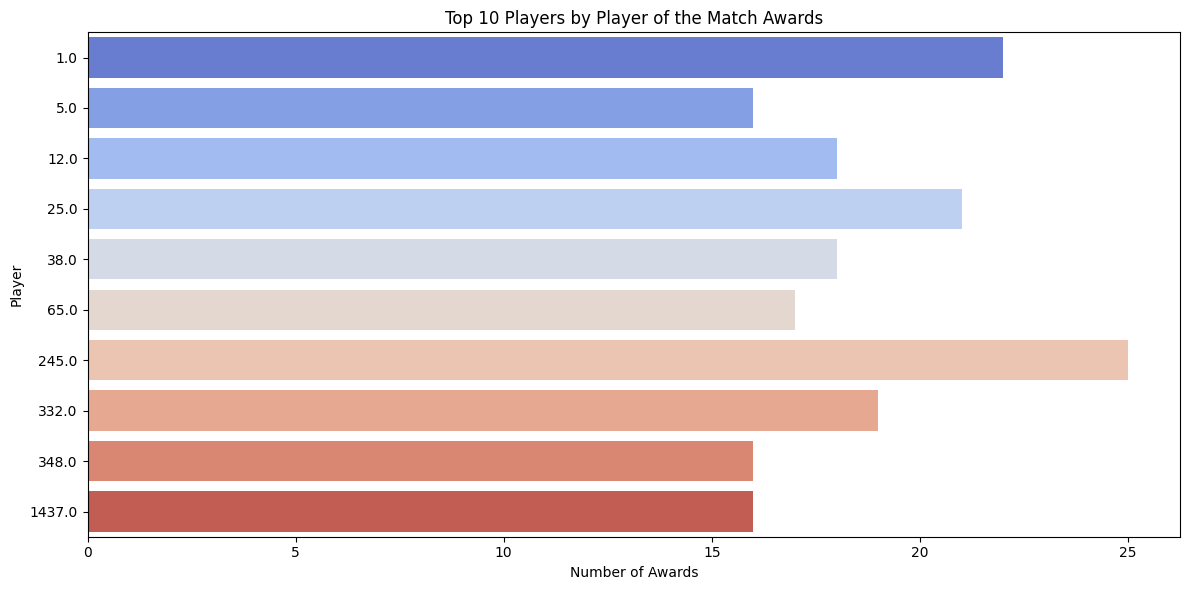

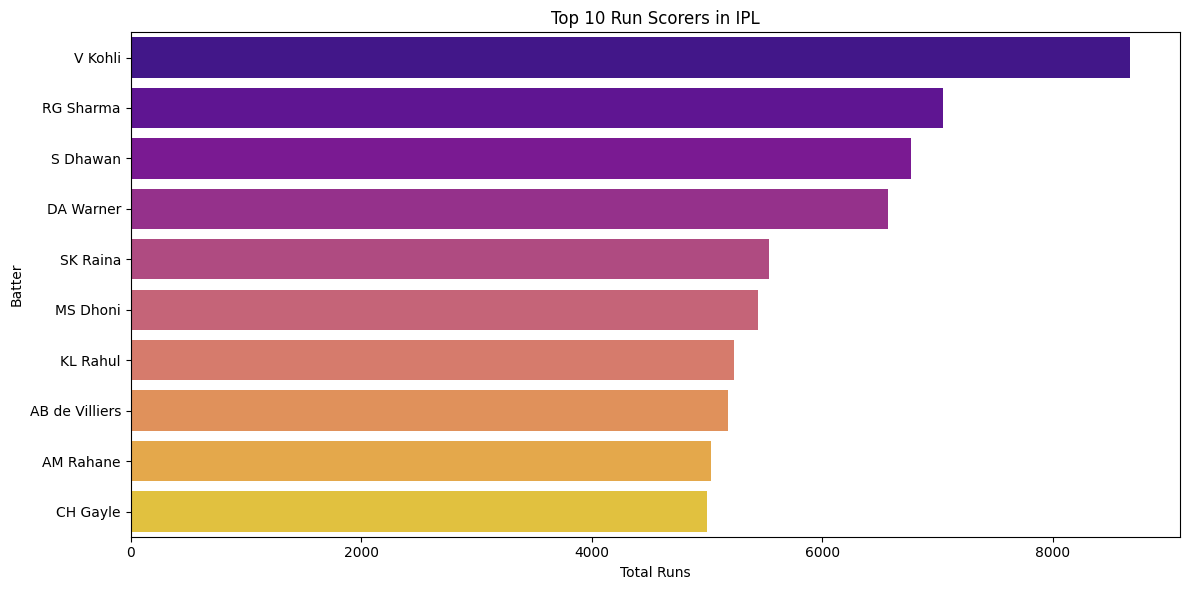

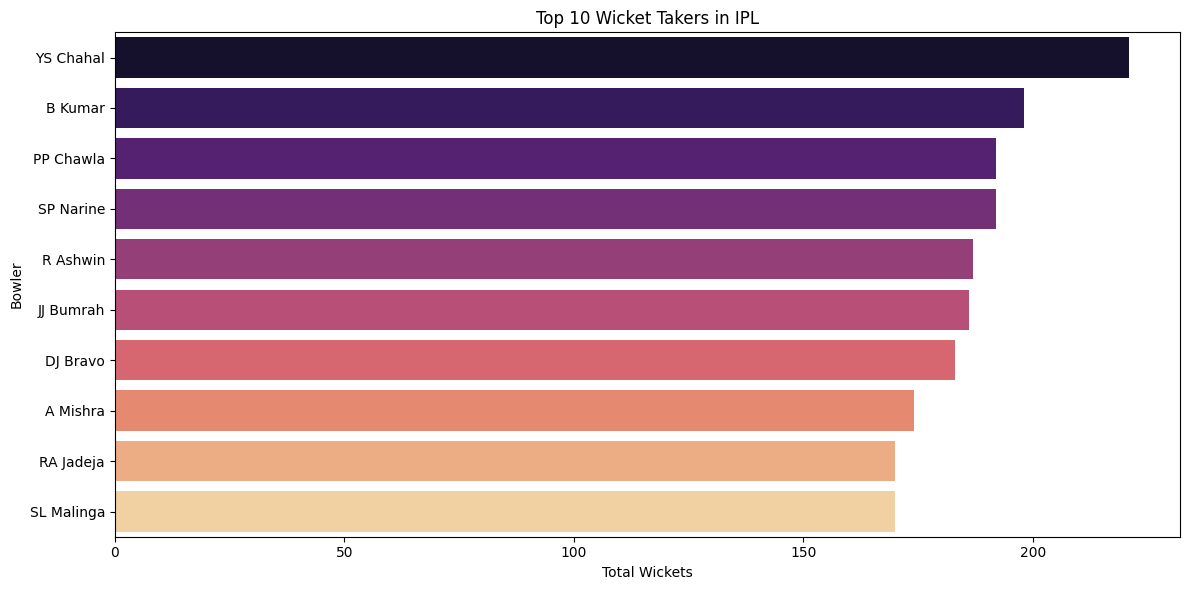

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ipl_matches_data' and the merged 'data' dataframes are loaded and available.
# ---- Player of the Match Analysis ----
player_of_match = ipl_matches_data['player_of_match'].value_counts().reset_index()
player_of_match.columns = ['player_name', 'awards_count']
top_10_pom = player_of_match.head(10)

print("Top 10 Players by Player of the Match Awards:")
print(top_10_pom)

# Visualize Top 10 Player of the Match
plt.figure(figsize=(12, 6))
sns.barplot(x='awards_count', y='player_name', data=top_10_pom, palette='coolwarm', orient='h')
plt.title('Top 10 Players by Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.tight_layout()
plt.savefig('top_10_player_of_match.png')
print("\nGenerated a bar chart for top 10 Player of the Match winners and saved it as 'top_10_player_of_match.png'")


# ---- Top Run Scorers Analysis ----
top_run_scorers = data.groupby('batter')['batter_runs'].sum().reset_index().sort_values(by='batter_runs', ascending=False)
top_10_run_scorers = top_run_scorers.head(10)

print("\nTop 10 Run Scorers in IPL:")
print(top_10_run_scorers)

# Visualize Top 10 Run Scorers
plt.figure(figsize=(12, 6))
sns.barplot(x='batter_runs', y='batter', data=top_10_run_scorers, palette='plasma', orient='h')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.tight_layout()
plt.savefig('top_10_run_scorers.png')
print("\nGenerated a bar chart for top 10 run scorers and saved it as 'top_10_run_scorers.png'")


# ---- Top Wicket Takers Analysis ----
# We need to exclude 'run out', 'retired hurt', and 'obstructing the field' as the bowler doesn't get credit.
wicket_kinds = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
top_wicket_takers = data[data['wicket_kind'].isin(wicket_kinds)].groupby('bowler')['is_wicket'].sum().reset_index().sort_values(by='is_wicket', ascending=False)
top_10_wicket_takers = top_wicket_takers.head(10)

print("\nTop 10 Wicket Takers in IPL:")
print(top_10_wicket_takers)

# Visualize Top 10 Wicket Takers
plt.figure(figsize=(12, 6))
sns.barplot(x='is_wicket', y='bowler', data=top_10_wicket_takers, palette='magma', orient='h')
plt.title('Top 10 Wicket Takers in IPL')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.tight_layout()
plt.savefig('top_10_wicket_takers.png')
print("\nGenerated a bar chart for top 10 wicket takers and saved it as 'top_10_wicket_takers.png'")

In [7]:
import pandas as pd

# Assuming the merged 'data' dataframe is available.

# Calculate player statistics for batting
player_batting_stats = data.groupby('batter').agg(
    total_runs=pd.NamedAgg(column='batter_runs', aggfunc='sum'),
    balls_faced=pd.NamedAgg(column='ball_number', aggfunc='count')
).reset_index()

# Calculate player statistics for bowling
# Exclude non-bowler credited wickets
wicket_kinds = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
player_bowling_stats = data[data['wicket_kind'].isin(wicket_kinds)].groupby('bowler').agg(
    total_wickets=pd.NamedAgg(column='is_wicket', aggfunc='sum')
).reset_index()

# Also count the number of balls bowled by each player
balls_bowled = data.groupby('bowler').agg(
    balls_bowled=pd.NamedAgg(column='ball_number', aggfunc='count')
).reset_index()

player_bowling_stats = pd.merge(player_bowling_stats, balls_bowled, on='bowler', how='left')


# Merge batting and bowling stats to create a player profile
player_stats = pd.merge(player_batting_stats, player_bowling_stats, left_on='batter', right_on='bowler', how='outer')
player_stats.fillna(0, inplace=True)
player_stats.rename(columns={'batter': 'player_name'}, inplace=True)


# --- Player Classification Logic ---
# We'll use these thresholds to classify players. These can be adjusted for different results.
RUNS_THRESHOLD = 1000
WICKETS_THRESHOLD = 50

def classify_player(row):
    is_batsman = row['total_runs'] >= RUNS_THRESHOLD
    is_bowler = row['total_wickets'] >= WICKETS_THRESHOLD

    if is_batsman and is_bowler:
        return 'All-Rounder'
    elif is_batsman:
        return 'Batsman'
    elif is_bowler:
        return 'Bowler'
    else:
        # For players who don't meet the thresholds, we'll classify them based on their primary skill.
        # This is a simplification but will work for our analysis.
        if row['total_runs'] > row['total_wickets'] * 20: # A rough heuristic: if runs are significantly more than wickets * 20
            return 'Batsman'
        else:
            return 'Bowler'

player_stats['player_role'] = player_stats.apply(classify_player, axis=1)

# Let's check the roles of some famous players
print("Player Role Classifications (Sample):")
print(player_stats[player_stats['player_name'].isin(['V Kohli', 'SK Raina', 'RA Jadeja', 'SL Malinga', 'JJ Bumrah'])][['player_name', 'total_runs', 'total_wickets', 'player_role']])

# Now, we have a dataframe 'player_stats' with player roles. We'll use this in the next step.
print("\nSuccessfully classified players into roles.")

Player Role Classifications (Sample):
    player_name  total_runs  total_wickets  player_role
272   JJ Bumrah        68.0          186.0       Bowler
521   RA Jadeja      3260.0          170.0  All-Rounder
601    SK Raina      5536.0           25.0      Batsman
605  SL Malinga        88.0          170.0       Bowler
698     V Kohli      8671.0            4.0      Batsman

Successfully classified players into roles.


C:\Users\prajw\AppData\Local\Temp\ipykernel_9012\30943532.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_composition['player_role'].fillna('Bowler', inplace=True)
C:\Users\prajw\AppData\Local\Temp\ipykernel_9012\30943532.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='win_percentage', y='composition_str', data=top_10_compositions, palette='Greens_r', orient='h

Top 10 Most Successful Team Compositions (min. 10 matches played):
                          composition_str  wins  matches_played  \
44   4 Batsmen, 2 All-Rounders, 4 Bowlers    16              16   
75   5 Batsmen, 1 All-Rounders, 4 Bowlers    26              27   
39   4 Batsmen, 1 All-Rounders, 5 Bowlers    21              22   
34   4 Batsmen, 0 All-Rounders, 5 Bowlers    12              13   
107  6 Batsmen, 0 All-Rounders, 4 Bowlers    11              12   
122  6 Batsmen, 2 All-Rounders, 3 Bowlers    10              11   
45   4 Batsmen, 2 All-Rounders, 5 Bowlers    11              13   
145  7 Batsmen, 0 All-Rounders, 6 Bowlers    21              25   
76   5 Batsmen, 1 All-Rounders, 5 Bowlers    31              37   
143  7 Batsmen, 0 All-Rounders, 4 Bowlers    17              21   

     win_percentage  
44       100.000000  
75        96.296296  
39        95.454545  
34        92.307692  
107       91.666667  
122       90.909091  
45        84.615385  
145       84.000000

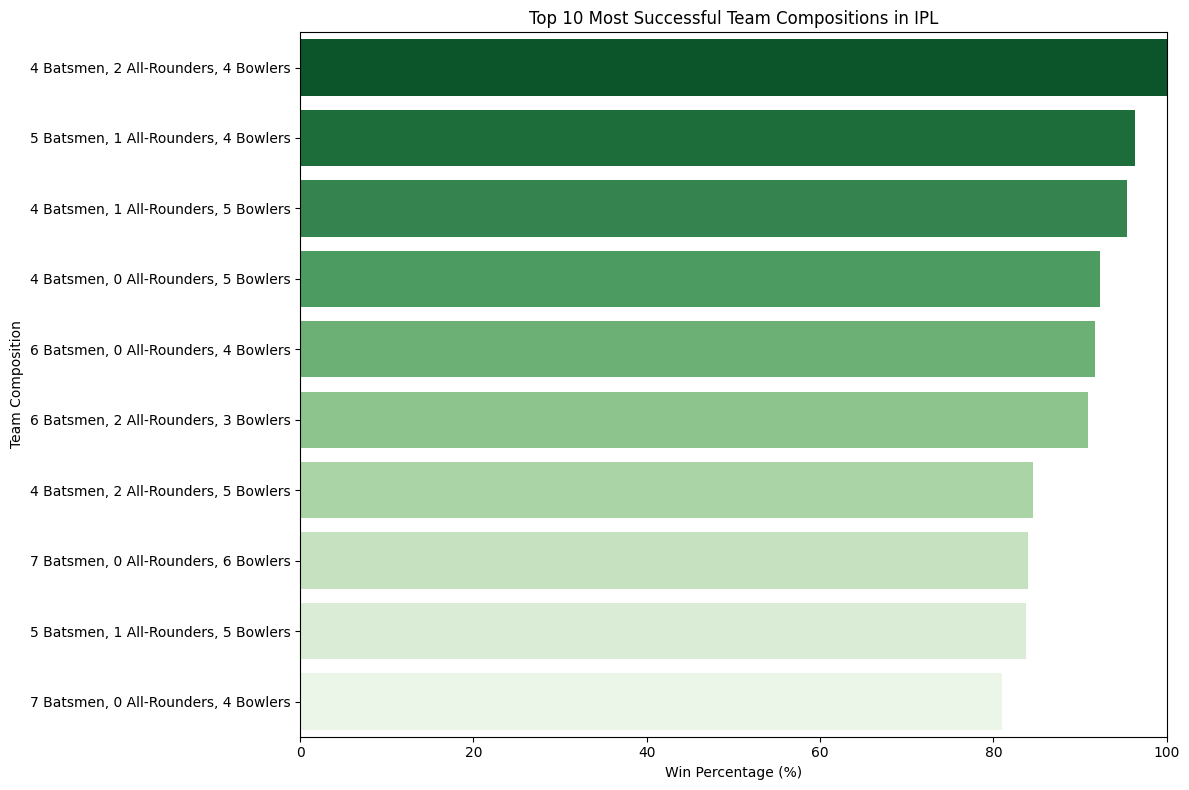

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' (merged dataframe) and 'player_stats' (with player roles) are available.
# Also assuming 'ipl_matches_data' is available for match winner information.

# --- Determine Team Composition for Each Match ---

# Get all players (batters, bowlers, non-strikers) for each team in each match
players_in_match = data.groupby(['match_id', 'team_batting']).agg({
    'batter': lambda x: list(x.unique()),
    'bowler': lambda x: list(x.unique()),
    'non_striker': lambda x: list(x.unique())
}).reset_index()

# Combine all player lists to get the playing XI for each team in each match
def get_playing_xi(row):
    playing_xi = set(row['batter']) | set(row['bowler']) | set(row['non_striker'])
    return list(playing_xi)

players_in_match['playing_xi'] = players_in_match.apply(get_playing_xi, axis=1)
team_players = players_in_match[['match_id', 'team_batting', 'playing_xi']]

# Map player roles to each player in the playing XI
player_roles = player_stats[['player_name', 'player_role']]
team_composition = team_players.explode('playing_xi').rename(columns={'playing_xi': 'player_name'})
team_composition = pd.merge(team_composition, player_roles, on='player_name', how='left')

# Fill missing roles with 'Bowler' as a default (for players with very little data)
team_composition['player_role'].fillna('Bowler', inplace=True)


# --- Analyze Team Composition vs. Win Probability ---

# Count the number of players in each role for each team in each match
composition_counts = team_composition.groupby(['match_id', 'team_batting', 'player_role']).size().unstack(fill_value=0).reset_index()

# Merge with match winner information
match_winners = ipl_matches_data[['match_id', 'match_winner']]
team_composition_with_results = pd.merge(composition_counts, match_winners, on='match_id')

# Add a 'win' column
team_composition_with_results['win'] = (team_composition_with_results['team_batting'] == team_composition_with_results['match_winner']).astype(int)

# Create a string representation of the team composition for grouping
team_composition_with_results['composition_str'] = team_composition_with_results.apply(
    lambda row: f"{row.get('Batsman', 0)} Batsmen, {row.get('All-Rounder', 0)} All-Rounders, {row.get('Bowler', 0)} Bowlers",
    axis=1
)

# Calculate win percentage for each composition
composition_summary = team_composition_with_results.groupby('composition_str')['win'].agg(['sum', 'count']).reset_index()
composition_summary.rename(columns={'sum': 'wins', 'count': 'matches_played'}, inplace=True)
composition_summary['win_percentage'] = (composition_summary['wins'] / composition_summary['matches_played']) * 100

# Filter for compositions that have been used a reasonable number of times (e.g., at least 10 matches)
min_matches_played = 10
successful_compositions = composition_summary[composition_summary['matches_played'] >= min_matches_played].sort_values(by='win_percentage', ascending=False)

top_10_compositions = successful_compositions.head(10)

print("Top 10 Most Successful Team Compositions (min. 10 matches played):")
print(top_10_compositions)


# --- Visualize the Results ---
plt.figure(figsize=(12, 8))
sns.barplot(x='win_percentage', y='composition_str', data=top_10_compositions, palette='Greens_r', orient='h')
plt.title('Top 10 Most Successful Team Compositions in IPL')
plt.xlabel('Win Percentage (%)')
plt.ylabel('Team Composition')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('top_10_team_compositions.png')
print("\nGenerated a bar chart for the most successful team compositions and saved it as 'top_10_team_compositions.png'")

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'composition_counts' (from step 7) and 'ipl_matches_data' are available.

# --- Create the ML features dataframe ---

# 1. Get team compositions for both teams in each match
team1_composition = composition_counts.copy()
team2_composition = composition_counts.copy()

# Rename columns to distinguish between team1 and team2
team1_composition.rename(columns={'team_batting': 'team1', 'Batsman': 'team1_batsmen', 'All-Rounder': 'team1_allrounders', 'Bowler': 'team1_bowlers'}, inplace=True)
team2_composition.rename(columns={'team_batting': 'team2', 'Batsman': 'team2_batsmen', 'All-Rounder': 'team2_allrounders', 'Bowler': 'team2_bowlers'}, inplace=True)

# 2. Merge these compositions with the main matches dataframe
# We will use ipl_matches_data as the base for our ML dataframe
ml_df = ipl_matches_data[['match_id', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'match_winner']].copy()

# Merge team1 composition
ml_df = pd.merge(ml_df, team1_composition[['match_id', 'team1', 'team1_batsmen', 'team1_allrounders', 'team1_bowlers']], on=['match_id', 'team1'], how='left')

# Merge team2 composition
ml_df = pd.merge(ml_df, team2_composition[['match_id', 'team2', 'team2_batsmen', 'team2_allrounders', 'team2_bowlers']], on=['match_id', 'team2'], how='left')

# 3. Clean the dataframe
# Drop rows with missing data (some older matches might not have complete ball-by-ball data)
ml_df.dropna(inplace=True)

# 4. Encode categorical features
# We will convert team names and other text data into numbers so the model can process them.
# 'team1', 'team2', 'toss_winner', 'match_winner' should all use the same encoding scheme.
teams = pd.concat([ml_df['team1'], ml_df['team2'], ml_df['toss_winner'], ml_df['match_winner']]).unique()
team_encoder = LabelEncoder().fit(teams)

ml_df['team1_encoded'] = team_encoder.transform(ml_df['team1'])
ml_df['team2_encoded'] = team_encoder.transform(ml_df['team2'])
ml_df['toss_winner_encoded'] = team_encoder.transform(ml_df['toss_winner'])
ml_df['match_winner_encoded'] = team_encoder.transform(ml_df['match_winner'])

# One-hot encode 'city' and 'toss_decision'
ml_df = pd.get_dummies(ml_df, columns=['city', 'toss_decision'], drop_first=True)


print("Feature Engineering Complete. Here's a look at the ML-ready dataframe:")
print(ml_df.head())

Feature Engineering Complete. Here's a look at the ML-ready dataframe:
   match_id  team1  team2  toss_winner  match_winner  team1_batsmen  \
0    335982      1      6            1             6              7   
1   1082591      2      1            1             2              8   
2   1082592      4      3            4             4              5   
3   1082593      5      6            6             6              7   
4   1082594    494      4          494           494              6   

   team1_allrounders  team1_bowlers  team2_batsmen  team2_allrounders  ...  \
0                  1              8            6.0                1.0  ...   
1                  1              4            9.0                1.0  ...   
2                  3              3            6.0                3.0  ...   
3                  1              4            3.0                0.0  ...   
4                  1              5            7.0                1.0  ...   

   city_New Chandigarh  city_Port

Training data shape: (931, 48)
Testing data shape: (233, 48)

Model Accuracy: 54.51%

Classification Report:
Could not generate detailed report due to an error: object of type 'numpy.int64' has no len()

Fallback Report (numeric labels):
              precision    recall  f1-score   support

           0       0.51      0.78      0.62        23
           1       0.52      0.78      0.62        18
           2       0.58      0.79      0.67        24
           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00         2
           5       0.59      0.61      0.60        33
           6       0.53      0.65      0.59        26
           7       0.52      0.46      0.49        26
           8       0.45      0.42      0.43        24
           9       0.58      0.38      0.46        29
          10       0.67      0.29      0.40         7
          11       0.75      0.33      0.46         9
          12       0.00      0.00      0.00         3
     

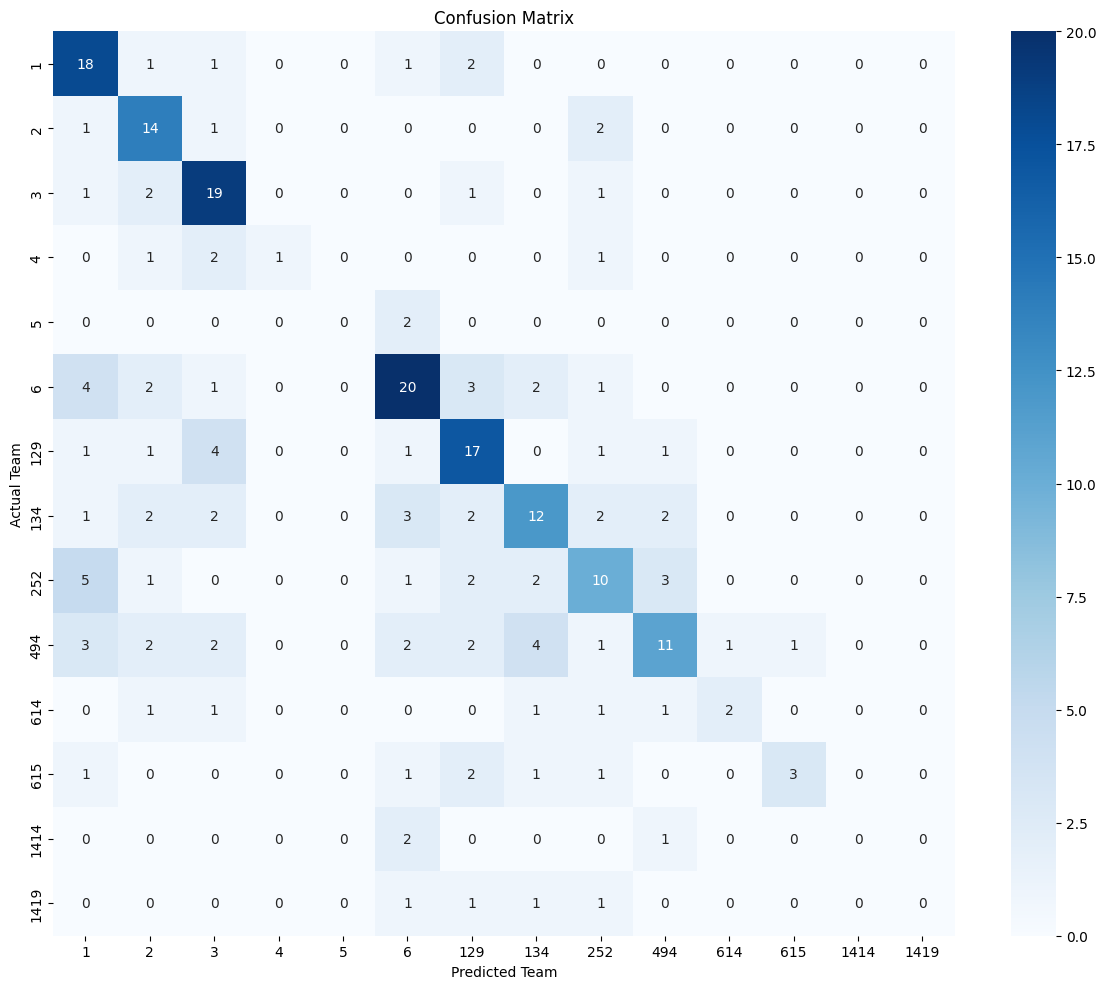

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ml_df' and 'team_encoder' from the previous step are available.

# --- 1. Define Features (X) and Target (y) ---
features = [col for col in ml_df.columns if col not in ['match_id', 'team1', 'team2', 'toss_winner', 'match_winner', 'match_winner_encoded']]
X = ml_df[features]
y = ml_df['match_winner_encoded']


# --- 2. Split the data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# --- 3. Train the Random Forest model ---
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


# --- 4. Make predictions and evaluate the model ---
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


# --- MORE ROBUST FIX IS HERE ---
# We will explicitly define the labels to use in the report.
# This ensures that even if some teams have 0 predictions, they are still accounted for.

# 1. Get all unique labels that are present in EITHER the actual test set OR the predicted set
present_labels = np.unique(np.concatenate((y_test, y_pred)))

# 2. Get the corresponding team names for these labels
present_target_names = team_encoder.inverse_transform(present_labels)

# 3. Generate the classification report using BOTH the 'labels' and 'target_names' parameters.
#    This is the most reliable way to prevent errors.
print("\nClassification Report:")
try:
    report = classification_report(y_test, y_pred, labels=present_labels, target_names=present_target_names, zero_division=0)
    print(report)
except Exception as e:
    print(f"Could not generate detailed report due to an error: {e}")
    print("\nFallback Report (numeric labels):")
    report = classification_report(y_test, y_pred, zero_division=0)
    print(report)

# ---------------------------------


# --- 5. Visualize the Confusion Matrix (Updated) ---
# We use the same 'present_labels' and 'present_target_names' to ensure consistency.
conf_matrix = confusion_matrix(y_test, y_pred, labels=present_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=present_target_names, yticklabels=present_target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Team')
plt.ylabel('Actual Team')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("\nGenerated a confusion matrix and saved it as 'confusion_matrix.png'")